##Year-on-year inflation in Poland 1982-2022

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [58]:
table = pd.read_html("https://stat.gov.pl/obszary-tematyczne/ceny-handel/wskazniki-cen/wskazniki-cen-towarow-i-uslug-konsumpcyjnych-pot-inflacja-/miesieczne-wskazniki-cen-towarow-i-uslug-konsumpcyjnych-od-1982-roku/")

In [59]:
table = table[0].iloc[81:122, 1:14]

In [60]:
months = [str(x) for x in range(1, 13)]

In [61]:
table = table.set_axis(['year']+months, axis=1)

In [62]:
table.iloc[23, 0] = '1999'

In [63]:
table = table.set_index('year')

In [64]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 2022 to 1982
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       41 non-null     object
 1   2       41 non-null     object
 2   3       41 non-null     object
 3   4       41 non-null     object
 4   5       41 non-null     object
 5   6       41 non-null     object
 6   7       41 non-null     object
 7   8       40 non-null     object
 8   9       40 non-null     object
 9   10      40 non-null     object
 10  11      40 non-null     object
 11  12      40 non-null     object
dtypes: object(12)
memory usage: 4.2+ KB


In [65]:
df = table.astype(float)

In [66]:
df = (df - 1000)/10

In [67]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2022,9.4,8.5,11.0,12.4,13.9,15.5,15.6,NaN,NaN,NaN,NaN,NaN
2021,2.6,2.4,3.2,4.3,4.7,4.4,5.0,5.5,5.9,6.8,7.8,8.6
2020,4.3,4.7,4.6,3.4,2.9,3.3,3.0,2.9,3.2,3.1,3.0,2.4
2019,0.7,1.2,1.7,2.2,2.4,2.6,2.9,2.9,2.6,2.5,2.6,3.4
2018,1.9,1.4,1.3,1.6,1.7,2.0,2.0,2.0,1.9,1.8,1.3,1.1
2017,1.7,2.2,2.0,2.0,1.9,1.5,1.7,1.8,2.2,2.1,2.5,2.1
2016,-0.9,-0.8,-0.9,-1.1,-0.9,-0.8,-0.9,-0.8,-0.5,-0.2,0.0,0.8
2015,-1.4,-1.6,-1.5,-1.1,-0.9,-0.8,-0.7,-0.6,-0.8,-0.7,-0.6,-0.5
2014,0.5,0.7,0.7,0.3,0.2,0.3,-0.2,-0.3,-0.3,-0.6,-0.6,-1.0


In [68]:
df = df.iloc[::-1]

In [69]:
df = pd.DataFrame(df.stack())

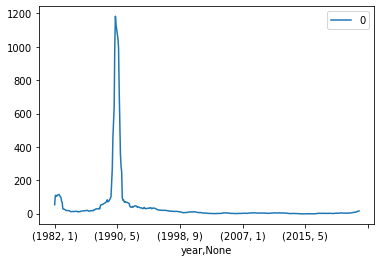

In [70]:
df.plot()

###Train-test split

In [93]:
# 80:20 ratio
train = df.head(int(len(df)*0.8))
test = df.tail(int(len(df)*0.2))

In [72]:
print("Whole dataset: ", len(df))
print("Train dataset: ", len(train))
print("Test dataset: ", len(test))

Whole dataset:  487
Train dataset:  389
Test dataset:  97


In [73]:
train = df.head(int(len(df)*0.8)+1)

In [74]:
len(train)

390

###Scaling the data

In [75]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

###Time batches

In [76]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [27]:
#X, y = generator[0]

###Simple Model

In [77]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50, input_shape=(length, 1)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [78]:
model.fit(generator, epochs=30)

Epoch 1/30
366/366 [==============================] - 3s 5ms/step - loss: 0.0043
Epoch 2/30
366/366 [==============================] - 2s 5ms/step - loss: 0.0017
Epoch 3/30
366/366 [==============================] - 2s 5ms/step - loss: 0.0012
Epoch 4/30
366/366 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 5/30
366/366 [==============================] - 2s 5ms/step - loss: 7.7872e-04
Epoch 6/30
366/366 [==============================] - 2s 5ms/step - loss: 8.1357e-04
Epoch 7/30
366/366 [==============================] - 2s 5ms/step - loss: 9.2234e-04
Epoch 8/30
366/366 [==============================] - 2s 5ms/step - loss: 7.0122e-04
Epoch 9/30
366/366 [==============================] - 2s 5ms/step - loss: 6.3455e-04
Epoch 10/30
366/366 [==============================] - 2s 5ms/step - loss: 8.5886e-04
Epoch 11/30
366/366 [==============================] - 2s 5ms/step - loss: 7.2795e-04
Epoch 12/30
366/366 [==============================] - 2s 5ms/step - loss: 5.91

**Evaluation**

In [79]:
first_eval_batch = scaled_train[-length:].reshape((1, length, 1))

In [80]:
model.predict(first_eval_batch)

array([[-0.00101486]], dtype=float32)

In [81]:
scaled_test[0]

array([-0.00033815])

In [82]:
test_eval_batch = scaled_test[:length].reshape((1, length, 1))

In [83]:
model.predict(test_eval_batch)

array([[-0.00192847]], dtype=float32)

In [84]:
scaled_test[length+1]

array([-0.00084538])

**Autoregressive predictions**

In [85]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [88]:
true_predictions = scaler.inverse_transform(test_predictions)

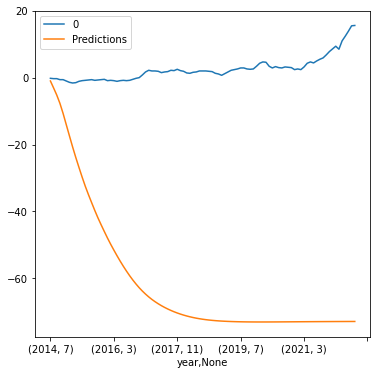

In [95]:
simpleRNNResult = test.copy()
simpleRNNResult['Predictions'] = true_predictions
simpleRNNResult.plot(figsize=(6, 6))

**Single-shot predictions**

In [105]:
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

In [106]:
test_pred = scaler.inverse_transform(model.predict(test_generator))

In [123]:
predict = test.copy()
predict = predict.iloc[length-1:-1]
predict.columns = ['actual']
predict['predicted'] = test_pred

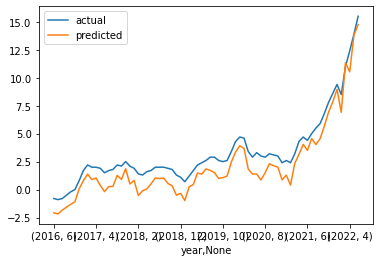

In [124]:
predict.plot()

In [132]:
eval_batch = scaled_test[-length:].reshape((1, length, 1))
august = scaler.inverse_transform(model.predict(eval_batch))
print("Predicted inflation y-o-y in August: ", august[0][0], '%')

Predicted inflation y-o-y in August:  15.21825 %


In [153]:
#real value in August = 16.1 https://www.bankier.pl/gospodarka/wskazniki-makroekonomiczne/inflacja-rdr-pol
true_august = pd.DataFrame([16.1])
true_august.index = [('2022',  '8')]
eval_batch = np.append(scaled_test[-length+1:], scaler.transform(true_august), axis=0)
eval_batch = eval_batch.reshape((1, length, 1))
september = scaler.inverse_transform(model.predict(eval_batch))
print("Predicted inflation y-o-y in September: ", september[0][0], '%')

Predicted inflation y-o-y in September:  15.3754225 %


TO DO: LSTM, GRU, forecasting another year